##[3장 회귀 알고리즘과 모델 규제]
###3-1 K-최근접 이웃 회귀
지도 학습 알고리즘은 크게 분류와 회귀로 나뉨.
앞서 공부한 내용은 기존의 샘플을 몇 개의 클래스 중 하나로 분류하는 문제였다면,
회귀는 임의의 어떤 숫자를 예측하는 문제

- K 최근접 이웃 회귀

 K 최근접 이웃 분류 문제에서는 가까운 샘플들의 클래스가 어떤 것인지 살펴봤다면,

 K최근접 이웃 회귀 문제는 가까운 샘플들의 실제 값의 평균을 이용하여 예측 타깃값을 구함.

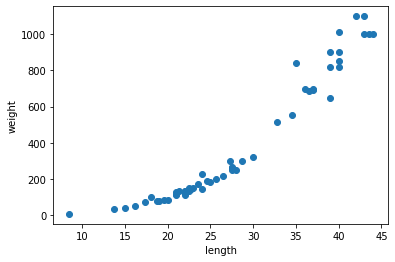

In [2]:
# 데이터 준비 및 확인
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 길이가 늘어날 수록 무게가 늘어나는 것을 확인할 수 있음

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length, perch_weight, random_state=42) #데이터 분할


In [4]:
#사이킷런에 사용할 데이터셋은 2차원 배열이어야 하기 때문에 배열을 바꿔줘야함
#reshape 함수를 통해 배열을 바꿀 수 있음 (아래 예시 참조)
test_array=np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array=test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
#데이터 셋 배열 바꾸기
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape) #reshape(-1,1)을 설정해주면 배열의 전체 원소 개수를 외우지 않아도 자동으로 설정해줌

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()
#K최근접 회귀 모델 훈련
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target)) #분류문제에서는 정확도가 나오고, 회귀문제에서는 결정계수 값이 나온다

0.992809406101064


In [10]:
#결정계수 외 평가값
#mean_absolute_error : 타깃과 예측의 절댓값 오차를 평균하여 반환하는 함수
from sklearn.metrics import mean_absolute_error
test_prediction=knr.predict(test_input)
mae=mean_absolute_error(test_target,test_prediction)
print(mae) #예측이 평균적으로 19g정도 타깃과 다름을 알 수 있음

19.157142857142862


###과대적합과 과소적합
테스트 세트 점수 < 훈련 세트 점수 : 과대적합 -> 모델을 간소화

테스트 세트 점수 > 훈련 세트 점수 : 과소적합 -> 모델을 복잡하게
- 다연히 훈련세트의 점수가 높은게 당연하지만, 그 차이가 엄청나게 크다면 과대적합을 의심해봐야함.
- 과소적합은 모델이 너무 단순하거나, 훈련 세트의 데이터 수가 너무 적어 모델이 적절히 훈련되지 못한 경우 발생함.


In [11]:
print(knr.score(train_input,train_target)) #테스트 셋의 점수가 더 높게 나옴을 확인할 수 있음 -> 과소적합

0.9698823289099254


In [12]:
# 훈련세트에 맞게 이웃 수 조정
# 이웃 수 축소(디폴트 값 : 5)
knr.n_neighbors =3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [14]:
print(knr.score(test_input,test_target)) #과소적합 해결됨 확인 완료

0.9746459963987609


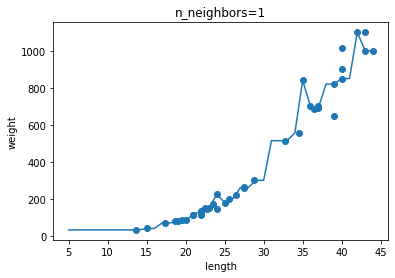

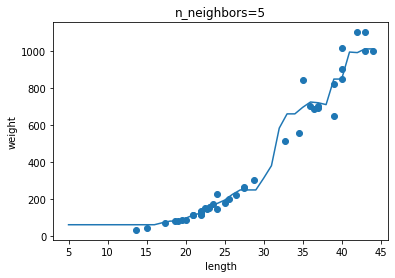

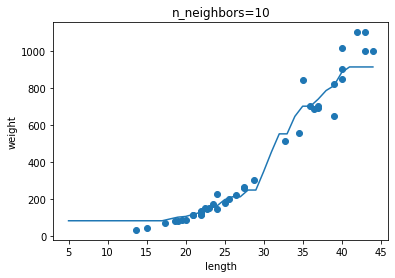

In [21]:
#이웃수 n 에 따라 모델의 변화 확인
knr=KNeighborsRegressor()
x=np.arange(5,45).reshape(-1,1)
#n=1,5,10
for n in [1,5,10]:
  knr.n_neighbors= n
  knr.fit(train_input, train_target)
  prediction=knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()


n 값이 커짐에 따라 모델이 단순해지는 것을 확인할 수 있음

##3-2 선형회귀
3-1절에서 공부한 k-최근접 이웃 회귀는 주변 샘플의 평균 값을 도출하므로, 기존 샘플의 영향을 크게 받는다.

In [22]:
# 길이가 50cm인 농어의 무게를 예측하는 예시
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
print(knr.predict([[50]]))

[1033.33333333]


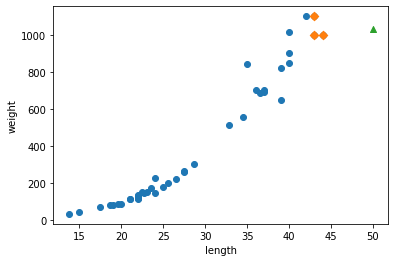

In [23]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #길이가 50cm나 되지만, 가장 가까운 값이 40~45cm인 농어라서 무게 또한 그들의 평균인 1033g으로 예측한 모습 -> 길이가 100cm짜리 생선을 넣어도 1033g으로 예측할 것

###선형회귀모델
특성 간 연결 관계를 하나의 직선으로 표현하고, 그 직선을 통해 예측하는 모델

y=ax+b 의 선형 모델로 만들어지며,객체에 저장되어 있다.

a= lr.coef_ 

b= lr.intercept_


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #객체 lr로 지정
lr.fit(train_input, train_target)
print(lr.predict([[50]])) #k최근접 이웃 회귀 모델과 달리 1241g으로 예측한 결과값을 볼 수 있다.

[1241.83860323]


In [26]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [27]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target)) #모델이 전체적으로 과소적합됨을 알 수 있음

0.939846333997604
0.8247503123313558


###다항회귀
위 산점도를 살펴보면, 데이터가 왼쪽 위로 조금 구부러진 곡선의 모양을 하고 있는 것을 볼 수 있음. 또한, 무게가 0g이하로 내려가는 것은 말이 안되는 현상임

-> 다항 회귀 모델을 만들 필요가 있음

다항식을 사용한 선형 회귀를 다항 회귀라 부름.

In [29]:
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape) #x의 값이 제곱되어 왼쪽 열에 추가되어 열이 2개가 된 모습 확인

(42, 2) (14, 2)


In [31]:
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [32]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이 모델은 데이터를

무게 = 1.014 x 길이^2 -21.557 x 길이 +116.05 로 학습함. 

In [33]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


길이를 제곱한 값을 모델에 넣어 학습하여 기존보다 결정계수 값이 많이 향상됨을 확인할 수 있다. 다만, 아직 train 셋의 결정계수값이 test 셋보다 낮아 과소적합이 있는 것으로 보여진다.